# Stock Market Analysis
In this project we will be analysing the stock market data of Uniqlo to extract some useful insights. 
As Uniqlo has been one of the largest clothing retailers in Japan for clothes to five decades, the stock data between 2012 and 2016 contained in this dataset showcase some interesting fluctuations that help when building predictive models.

To do so we will be using pandas to extract and analyse the information, visualize it, and look at different ways to analyse the risk of a stock, based on it's performance history. 

Here are some questions we will try to answer:-
1) What was the change in a stock's price over time?
2) What was the daily return average of a stock?
3) How can we attempt to predict future stock behaviour?




Importing libraries

In [120]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import DataReader
from datetime import datetime

##Importing the dataset

In [42]:
file_path = 'https://github.com/sakshamshivhare285/Stock-price-prediction-using-time-series-data/raw/refs/heads/main/Uniqlo(FastRetailing)%202012-2016%20Training%20-%20stocks2012-2016.csv'
stock_data = pd.read_csv(file_path, error_bad_lines=False)
print(stock_data.head())

         Date   Open   High    Low  Close  Volume  Stock Trading
0  2016-12-30  42120  42330  41700  41830  610000    25628028000
1  2016-12-29  43000  43220  42540  42660  448400    19188227000
2  2016-12-28  43940  43970  43270  43270  339900    14780670000
3  2016-12-27  43140  43700  43140  43620  400100    17427993000
4  2016-12-26  43310  43660  43090  43340  358200    15547803000


In [38]:
#Some basic info about the data frame(stock_data)
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB


In [41]:
##Basic stats for Uniqlo's data
stock_data.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


Cleaning the data

In [119]:
#Checking for missing values
print(stock_data.isnull().sum())

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
Stock Trading      0
MA for 10 days     9
MA for 30 days    29
MA for 50 days    49
Daily Return       1
Adj Close          0
dtype: int64


In [112]:
#ensuring data variable is in data time format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])   ##converting date to date time format
stock_data = stock_data.sort_values(by = 'Date')     ##sorting the dataframe by date in ascending order

What was the change in stock's over time?

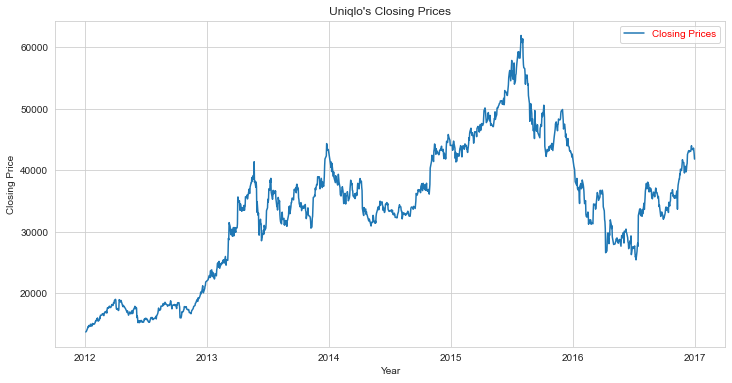

In [94]:
#Plotting the stock's closing price using pandas
plt.figure(figsize=(12,6))
plt.title("Uniqlo's Closing Prices")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.plot(stock_data['Date'], stock_data['Close'], label = "Closing Prices")
plt.legend(labelcolor = "red")
plt.show()

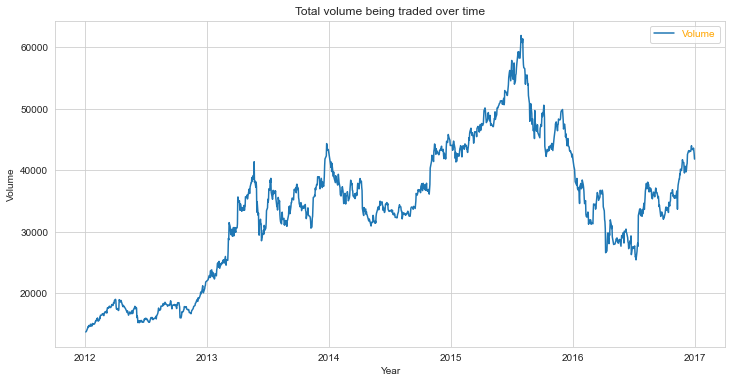

In [95]:
#Plotting the total volume being traded over time
plt.figure(figsize=(12,6))
plt.title("Total volume being traded over time")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.plot(stock_data['Date'], stock_data['Close'], label = "Volume")
plt.legend(labelcolor = "orange")
plt.show()

What was the daily return average of a stock?

In [111]:
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()
stock_data['Daily Return'].tail()

4   -0.003220
3    0.006461
2   -0.008024
1   -0.014098
0   -0.019456
Name: Daily Return, dtype: float64

<AxesSubplot:>

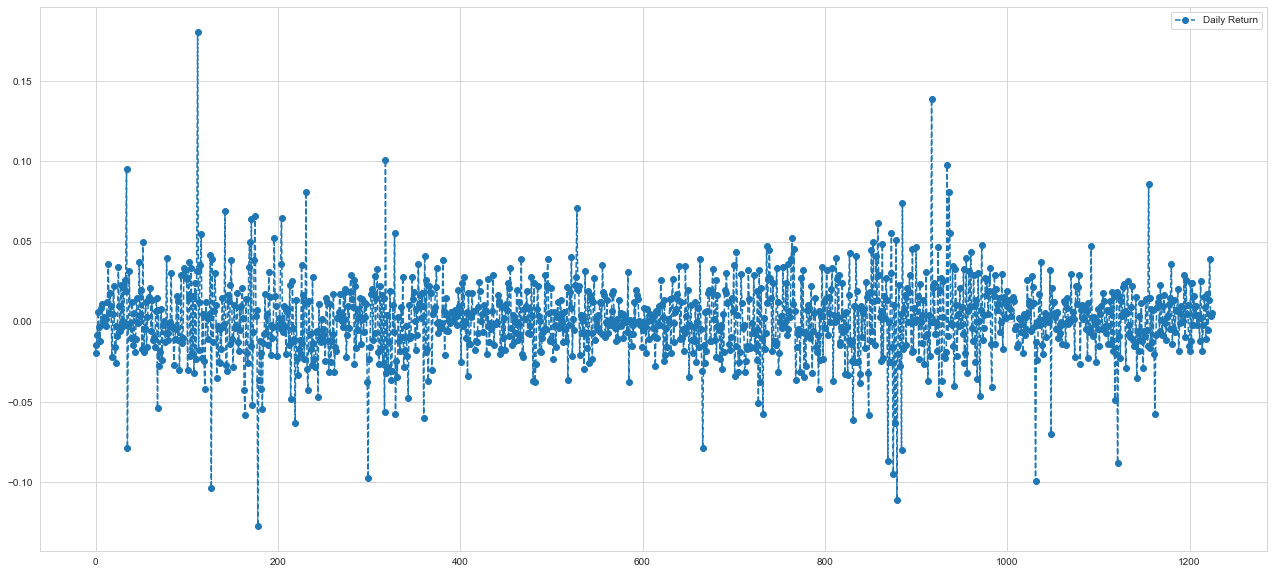

In [117]:
stock_data['Daily Return'].plot(figsize=(22,10),legend=True,linestyle='--',marker='o')

In [125]:
def calculate_rsi(data, window = 14):
    delta = data['Close'].diff()     ## calculates difference between the current day's closing price and the previous days closing prics
    gain = (delta.where(delta>0,0)).rolling(window=window).mean()  
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
stock_data['RSI'] = calculate_rsi(stock_data)

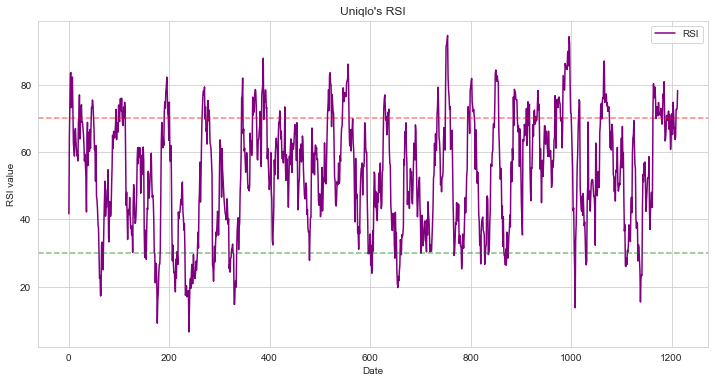

In [133]:
plt.figure(figsize=(12,6))
plt.plot(stock_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')  ##overbought value
plt.axhline(30, linestyle='--', alpha=0.5, color='green') ##oversold value
plt.title("Uniqlo's RSI")
plt.ylabel('RSI value')
plt.xlabel('Date')
plt.legend()


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X = stock_data[['Open', 'High', 'Low', 'Volume']]  # Features
y = stock_data['Close']  # Target variable
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Print results formatted to two decimal places
for name, mse in results.items():
    print(f'{name}: {mse:.2f}')


Linear Regression: 73107.24
Decision Tree: 172807.72
Random Forest: 121279.48


In [141]:
# Determine the best model based on MSE
best_model_name = min(results, key=results.get)
best_model_mse = results[best_model_name]

print(f'Best Model: {best_model_name} with MSE: {best_model_mse:.2f}')

Best Model: Linear Regression with MSE: 73107.24
